In [2]:
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt
parentdir = os.path.dirname(os.getcwd())
sys.path.append(parentdir)
import textwrap
import math
from scipy.stats import mode
import matplotlib as mpl 
cmap = mpl.cm.get_cmap("viridis")
import pandas as pd
import matplotlib.gridspec as gridspec


/tmp/ipykernel_1139517/3647954870.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("viridis")


In [3]:
import matplotlib.colors as mcolors

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_c = mcolors.to_hex(c1)
    c2_c = mcolors.to_hex(c2)

    c1_rgb = np.array(hex_to_RGB(c1_c))/255
    c2_rgb = np.array(hex_to_RGB(c2_c))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

### Fig 3a


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


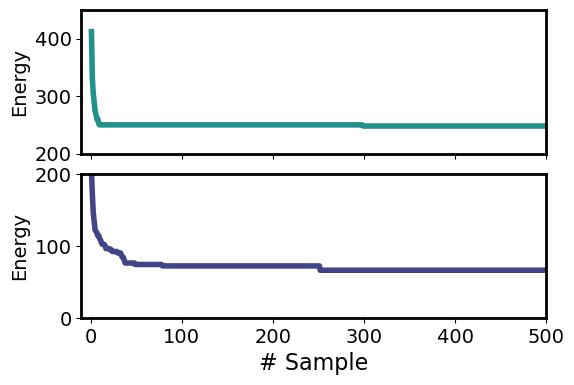

In [4]:

df = pd.read_csv("Fig3a.csv")
fig =  plt.figure(figsize=(6, 4))
main_gs = gridspec.GridSpec(1, 1, figure=fig, hspace=0.4, wspace=0.3)

sub_gs = main_gs[0,0].subgridspec(2, 1, hspace=0.14)
ax_top = fig.add_subplot(sub_gs[0])
ax_bottom = fig.add_subplot(sub_gs[1], sharex=ax_top)


ax_top.plot(df["sample_ising"],df["ising_energy"], color=cmap(0.5), linewidth = 4)

ax_bottom.plot(df["sample_vectorized"],df["vectorized_energy"], color=cmap(0.2), linewidth = 4)



ax_bottom.set_xlabel("# Sample",  fontsize=16)
ax_bottom.set_ylabel("Energy",  fontsize=14)
ax_top.set_ylabel("Energy",  fontsize=14)
ax_bottom.set_xlim(-10, 500)

ax_bottom.set_ylim(0, 200)
ax_bottom.set_yticks([0,  100,  200])
ax_bottom.tick_params(axis='x', labelsize=14)  
ax_bottom.tick_params(axis='y', labelsize=14) 

ax_top.set_ylim(200, 450)
ax_top.set_yticks([200, 300, 400])

ax_top.tick_params(axis='x', labelsize=14)  
ax_top.tick_params(axis='y', labelsize=14) 
ax_top.legend(edgecolor = 'none',  fontsize=14).set_visible(True)
ax_top.tick_params(labelbottom=False)

ax_top.spines['top'].set_linewidth(2)
ax_top.spines['right'].set_linewidth(2)
ax_top.spines['bottom'].set_linewidth(2)
ax_top.spines['left'].set_linewidth(2)

ax_bottom.spines['top'].set_linewidth(2)
ax_bottom.spines['right'].set_linewidth(2)
ax_bottom.spines['bottom'].set_linewidth(2)
ax_bottom.spines['left'].set_linewidth(2)

### Fig 3b

/tmp/ipykernel_1139517/1881859423.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


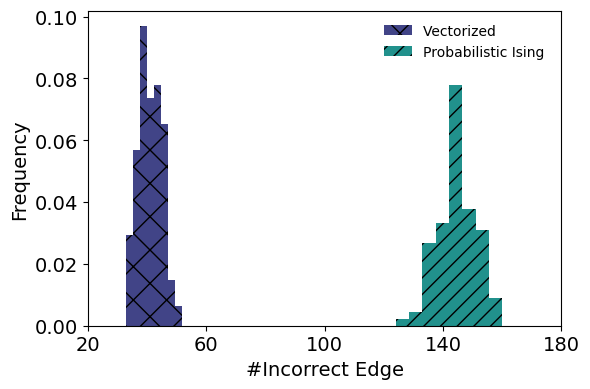

In [5]:
df = pd.read_csv("Fig3b.csv")
fig=  plt.figure(figsize=(6, 4))
cmap = plt.cm.get_cmap("viridis")
bins = 8


   

plt.hist(df["incorrect_vectorized_energy"] , bins=bins, color=cmap(0.2),  label='Vectorized ', histtype='stepfilled', hatch='x', density="True") 
plt.hist(df["incorrect_ising_energy"], bins=bins, color=cmap(0.5),  label='Probabilistic Ising ', histtype='stepfilled', hatch='//', density="True")   

plt.xlabel('#Incorrect Edge', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.tick_params(axis='both', labelsize=14)
# plt.set_title(f'{problem}')
plt.legend(frameon =False)
plt.xlim([20, 180])
plt.xticks([20, 60, 100, 140, 180])

plt.tight_layout()
# Show plot
plt.show()

#### Fig 3c

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


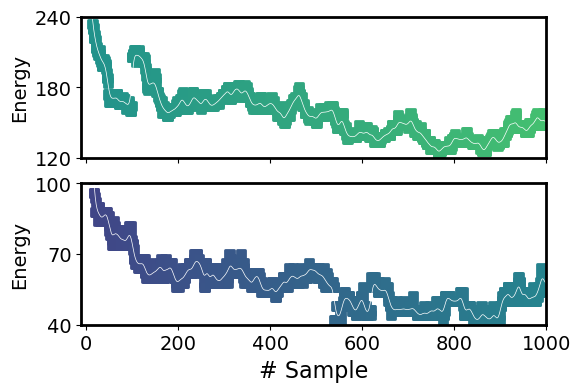

In [6]:
df = pd.read_csv("Fig3c.csv")

from scipy.ndimage import gaussian_filter1d

y_smooth = gaussian_filter1d(df["ising_energy"], sigma=4)  # Adjust sigma for smoothness

y_smooth_ising = gaussian_filter1d(df["vectorized_energy"], sigma=4)  # Adjust sigma for smoothness



fig =  plt.figure(figsize=(6, 4))
main_gs = gridspec.GridSpec(1, 1, figure=fig, hspace=0.4, wspace=0.3)

sub_gs = main_gs[0,0].subgridspec(2, 1, hspace=0.18)
ax_top = fig.add_subplot(sub_gs[0])
ax_bottom = fig.add_subplot(sub_gs[1], sharex=ax_top)

ax_bottom.scatter(df["sample_ising"],df["ising_energy"], marker = "s", color=get_color_gradient(cmap(0.2), cmap(0.45), len(df["ising_energy"])), linewidth = 2)
ax_bottom.plot(df["sample_ising"], y_smooth,color="white", linewidth = 0.5)

ax_top.scatter(df["sample_vectorized"],df["vectorized_energy"], marker = "s", color=get_color_gradient(cmap(0.5), cmap(0.7), len(df["ising_energy"])), linewidth = 2)

ax_top.plot(df["sample_vectorized"], y_smooth_ising,color="white", linewidth = 0.5)





ax_bottom.set_xlabel("# Sample",  fontsize=16)
ax_bottom.set_ylabel("Energy",  fontsize=14)
ax_top.set_ylabel("Energy",  fontsize=14)
ax_bottom.set_xlim(-10, 1000)

ax_top.set_ylim(120, 240)
ax_top.set_yticks([120,  180,  240])
ax_bottom.tick_params(axis='x', labelsize=14)  
ax_bottom.tick_params(axis='y', labelsize=14) 

ax_bottom.set_ylim(40, 100)
ax_bottom.set_yticks([40, 70, 100])

ax_top.tick_params(axis='x', labelsize=14)  
ax_top.tick_params(axis='y', labelsize=14) 
ax_top.legend(edgecolor = 'none',  fontsize=14).set_visible(True)
ax_top.tick_params(labelbottom=False)

ax_top.spines['top'].set_linewidth(2)
ax_top.spines['right'].set_linewidth(2)
ax_top.spines['bottom'].set_linewidth(2)
ax_top.spines['left'].set_linewidth(2)

ax_bottom.spines['top'].set_linewidth(2)
ax_bottom.spines['right'].set_linewidth(2)
ax_bottom.spines['bottom'].set_linewidth(2)
ax_bottom.spines['left'].set_linewidth(2)

### Fig. 4a

/tmp/ipykernel_1139517/3502998777.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("viridis")


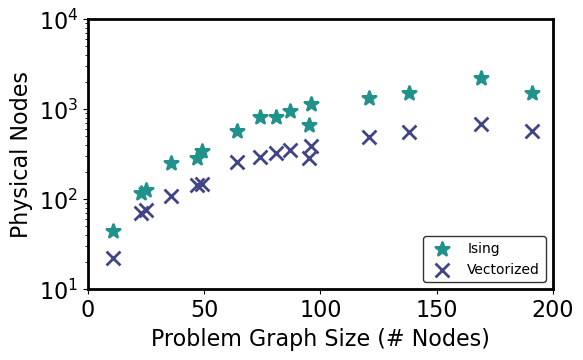

In [7]:
df = pd.read_csv("Fig4a.csv")

cmap = mpl.cm.get_cmap("viridis")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.5))


ax.scatter(df["num_nodes"], df["Ising"], color=cmap(0.5), marker='*', s=100,label='Ising', linewidth = 2)

ax.scatter(df["num_nodes"], df["Vectorized"], color=cmap(0.2),marker='x', s=100, label='Vectorized',linewidth = 2)
ax.set_yscale('log')
# # ax.set_xscale('log')

ax.set_xlabel("Problem Graph Size (# Nodes)",  fontsize=16)
ax.set_ylabel("Physical Nodes",  fontsize=16)
ax.set_xlim(0, 200)
# plt.gca().invert_yaxis()
# # ax.set_xticks(np.arange(0, 800+200, 200))
ax.set_ylim(10, 10000)
# # ax.set_yticks([1e-2, 1e-1, 1e0])
ax.tick_params(axis='x', labelsize=16)  
ax.tick_params(axis='y', labelsize=16) 
ax.legend(edgecolor = 'none',  fontsize=14, loc='lower right').set_visible(True)
ax.legend(frameon=True, edgecolor='black',loc='lower right')
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

### Fig 4b

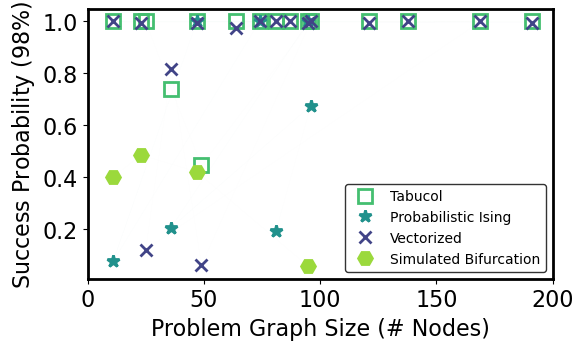

In [8]:
df = pd.read_csv("Fig4b.csv")

plt.figure(figsize=(6, 3.5))  # Width: 8 inches, Height: 6 inches

plt.plot(df["nodes_tabucol"], df["psuccess_tabucol"], linestyle=':', marker='s', markeredgewidth=2,markerfacecolor='none', markersize=10, color=cmap(0.7), linewidth=0.005, label='Tabucol')

nodes_ising = np.array(df["nodes_probabilistic_ising"])[np.array(df["psuccess_probabilistic_ising"]) != 0]
pgnd_ising_m = np.array(df["psuccess_probabilistic_ising"])[np.array(df["psuccess_probabilistic_ising"]) != 0]

plt.plot(nodes_ising, pgnd_ising_m, linestyle='-', marker='*',  markeredgewidth=2, markersize=9, label='Probabilistic Ising', linewidth=0.005, color=cmap(0.5))

plt.plot(df["nodes_vectorized"], df["psuccess_vectorized"], linestyle=':', marker='x', markeredgewidth=2, markersize=9, color=cmap(0.2), linewidth=0.005, label='Vectorized')

nodes_sbm = np.array(df["nodes_sbm"])[df["psuccess_sbm"]!= 0]
pgnd_sbm = np.array(df["psuccess_sbm"])[df["psuccess_sbm"] != 0]

plt.plot(nodes_sbm, pgnd_sbm, linestyle=':', marker='H', markeredgewidth=2, markersize=10,  label='Simulated Bifurcation',  color=cmap(0.85), linewidth = 0.001)
# # plt.yscale("log")

plt.ylabel('Success Probability (98$\%$)', fontsize=16)

plt.xlabel("Problem Graph Size (# Nodes)",  fontsize=16)


plt.xlim([0, 200])
plt.xticks( [0, 50, 100, 150, 200],fontsize=16)
plt.yticks( fontsize=16)

plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.legend(frameon=True, edgecolor='black')

# Show plot
plt.show()

### Fig 4c

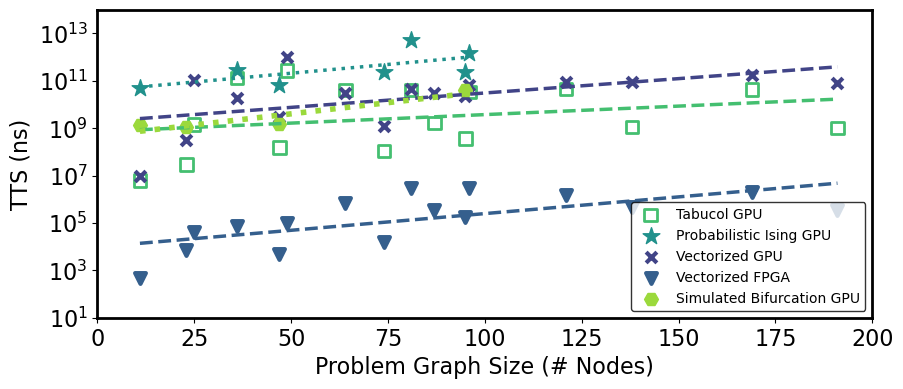

In [9]:
df = pd.read_csv("Fig4c.csv")


plt.figure(figsize=(10, 4))  # Width: 8 inches, Height: 6 inches
plt.yscale('log')

log_Tabucol = np.log(df["TTS_tabucol_gpu"]*1e9)
coefficients = np.polyfit(df["nodes_tabucol_gpu"], log_Tabucol, 1)  # Linear fit after log transformation
fit_line_Tabucol = np.polyval(coefficients, df["nodes_tabucol_gpu"])

# indices = np.argsort(nodes)
log_vectorized = np.log(df["TTS_vectorized_gpu"]*1e9)
coefficients = np.polyfit(df["nodes_vectorized_gpu"], log_vectorized, 1)  # Linear fit after log transformation
fit_line_vectorized = np.polyval(coefficients, df["nodes_vectorized_gpu"])

log_vectorized_fpga = np.log(df["TTS_vectorized_fpga"]*1e9)
coefficients = np.polyfit(df["nodes_vectorized_fpga"], log_vectorized_fpga, 1)  # Linear fit after log transformation
fit_line_vectorized_fpga = np.polyval(coefficients, df["nodes_vectorized_fpga"])

#### Probabilistic ising ################
nodes_ising = df["nodes_probabilistic_ising_gpu"][df["TTS_probabilistic_ising_gpu"] != np.inf]
TTS_ising_m  = np.array(df["TTS_probabilistic_ising_gpu"])[df["TTS_probabilistic_ising_gpu"] != np.inf]
log_ising = np.log(np.array(TTS_ising_m)*1e9)
coefficients = np.polyfit(np.array(nodes_ising), log_ising, 1)  # Linear fit after log transformation
fit_line_ising= np.polyval(coefficients, np.array(nodes_ising))
#### SBM  #######
nodes_sbm = df["nodes_sbm_gpu"][df["TTS_sbm_gpu"] != np.inf]
TTS_SBM_m  = np.array(df["TTS_sbm_gpu"])[df["TTS_sbm_gpu"] != np.inf]
log_SBM = np.log(np.array(TTS_SBM_m)*1e9)
coefficients = np.polyfit(np.array(nodes_sbm), log_SBM, 1)  # Linear fit after log transformation
fit_line_SBM= np.polyval(coefficients, np.array(nodes_sbm))
###############
indices = np.argsort(df["nodes_tabucol_gpu"])
plt.scatter(df["nodes_tabucol_gpu"], np.array(df["TTS_tabucol_gpu"])*1e9, marker='s', s=80, label='Tabucol GPU', linewidth = 2, facecolors='none', color=cmap(0.7))
plt.plot(df["nodes_tabucol_gpu"][indices], np.exp(fit_line_Tabucol)[indices], linestyle='--', color=cmap(0.7), linewidth = 2.5)

indices = np.argsort(np.array(nodes_ising))
plt.scatter(np.array(nodes_ising), np.array(TTS_ising_m)*1e9, marker='*', s=160, label='Probabilistic Ising GPU',  color=cmap(0.5))

plt.plot(np.array(nodes_ising)[indices], np.exp(fit_line_ising)[indices], linestyle=':',  linewidth=2.5, color=cmap(0.5))

indices = np.argsort(df["nodes_vectorized_gpu"])

plt.scatter(df["nodes_vectorized_gpu"], df["TTS_vectorized_gpu"]*1e9, marker='x', s=60, label='Vectorized GPU',  color=cmap(0.2), linewidth = 3)
plt.plot(df["nodes_vectorized_gpu"][indices], np.exp(fit_line_vectorized)[indices],linestyle='--' ,   color=cmap(0.2), linewidth = 2.5)

indices = np.argsort(df["nodes_vectorized_fpga"])
plt.scatter(df["nodes_vectorized_fpga"], df["TTS_vectorized_fpga"]*1e9, marker='v', s=60, label='Vectorized FPGA',  color=cmap(0.3), linewidth = 3)
plt.plot(df["nodes_vectorized_fpga"][indices], np.exp(fit_line_vectorized_fpga)[indices],  linestyle='--' , color=cmap(0.3), linewidth = 2.5)

plt.scatter(np.array(nodes_sbm), np.array(TTS_SBM_m)*1e9, marker='H', s=100, label='Simulated Bifurcation GPU',  color=cmap(0.85))
plt.plot(np.array(nodes_sbm), np.exp(fit_line_SBM),  linestyle=':',color=cmap(0.85), linewidth =4)

# Add labels and legend
plt.ylabel('TTS (ns)', fontsize=16)


plt.xlabel("Problem Graph Size (# Nodes)",  fontsize=16)

plt.ylim([1e1, 1e14])
plt.xlim([0, 200])

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)

plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.legend(frameon=True, edgecolor='black')

# Show plot
plt.show()

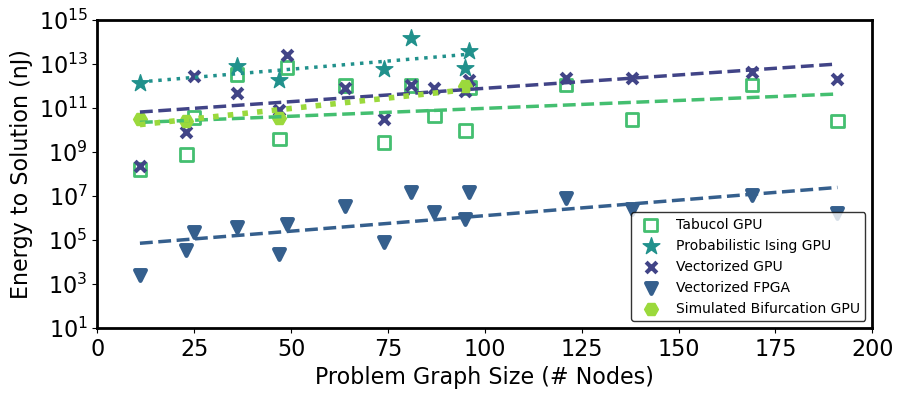

In [11]:
df = pd.read_csv("Fig4d.csv")


plt.figure(figsize=(10, 4))  # Width: 8 inches, Height: 6 inches
plt.yscale('log')

log_Tabucol = np.log(df["ETS_tabucol_gpu"]*1e9)
coefficients = np.polyfit(df["nodes_tabucol_gpu"], log_Tabucol, 1)  # Linear fit after log transformation
fit_line_Tabucol = np.polyval(coefficients, df["nodes_tabucol_gpu"])

# indices = np.argsort(nodes)
log_vectorized = np.log(df["ETS_vectorized_gpu"]*1e9)
coefficients = np.polyfit(df["nodes_vectorized_gpu"], log_vectorized, 1)  # Linear fit after log transformation
fit_line_vectorized = np.polyval(coefficients, df["nodes_vectorized_gpu"])

log_vectorized_fpga = np.log(df["ETS_vectorized_fpga"]*1e9)
coefficients = np.polyfit(df["nodes_vectorized_fpga"], log_vectorized_fpga, 1)  # Linear fit after log transformation
fit_line_vectorized_fpga = np.polyval(coefficients, df["nodes_vectorized_fpga"])

#### Probabilistic ising ################
nodes_ising = df["nodes_probabilistic_ising_gpu"][df["ETS_probabilistic_ising_gpu"] != np.inf]
ETS_ising_m  = np.array(df["ETS_probabilistic_ising_gpu"])[df["ETS_probabilistic_ising_gpu"] != np.inf]
log_ising = np.log(np.array(ETS_ising_m)*1e9)
coefficients = np.polyfit(np.array(nodes_ising), log_ising, 1)  # Linear fit after log transformation
fit_line_ising= np.polyval(coefficients, np.array(nodes_ising))
#### SBM  #######
nodes_sbm = df["nodes_sbm_gpu"][df["ETS_sbm_gpu"] != np.inf]
ETS_SBM_m  = np.array(df["ETS_sbm_gpu"])[df["ETS_sbm_gpu"] != np.inf]
log_SBM = np.log(np.array(ETS_SBM_m)*1e9)
coefficients = np.polyfit(np.array(nodes_sbm), log_SBM, 1)  # Linear fit after log transformation
fit_line_SBM= np.polyval(coefficients, np.array(nodes_sbm))
###############
indices = np.argsort(df["nodes_tabucol_gpu"])
plt.scatter(df["nodes_tabucol_gpu"], np.array(df["ETS_tabucol_gpu"])*1e9, marker='s', s=80, label='Tabucol GPU', linewidth = 2, facecolors='none', color=cmap(0.7))
plt.plot(df["nodes_tabucol_gpu"][indices], np.exp(fit_line_Tabucol)[indices], linestyle='--', color=cmap(0.7), linewidth = 2.5)

indices = np.argsort(np.array(nodes_ising))
plt.scatter(np.array(nodes_ising), np.array(ETS_ising_m)*1e9, marker='*', s=160, label='Probabilistic Ising GPU',  color=cmap(0.5))

plt.plot(np.array(nodes_ising)[indices], np.exp(fit_line_ising)[indices], linestyle=':',  linewidth=2.5, color=cmap(0.5))

indices = np.argsort(df["nodes_vectorized_gpu"])

plt.scatter(df["nodes_vectorized_gpu"], df["ETS_vectorized_gpu"]*1e9, marker='x', s=60, label='Vectorized GPU',  color=cmap(0.2), linewidth = 3)
plt.plot(df["nodes_vectorized_gpu"][indices], np.exp(fit_line_vectorized)[indices],linestyle='--' ,   color=cmap(0.2), linewidth = 2.5)

indices = np.argsort(df["nodes_vectorized_fpga"])
plt.scatter(df["nodes_vectorized_fpga"], df["ETS_vectorized_fpga"]*1e9, marker='v', s=60, label='Vectorized FPGA',  color=cmap(0.3), linewidth = 3)
plt.plot(df["nodes_vectorized_fpga"][indices], np.exp(fit_line_vectorized_fpga)[indices],  linestyle='--' , color=cmap(0.3), linewidth = 2.5)

plt.scatter(np.array(nodes_sbm), np.array(ETS_SBM_m)*1e9, marker='H', s=100, label='Simulated Bifurcation GPU',  color=cmap(0.85))
plt.plot(np.array(nodes_sbm), np.exp(fit_line_SBM),  linestyle=':',color=cmap(0.85), linewidth =4)


# Add labels and legend
plt.ylabel('Energy to Solution (nJ)', fontsize=16)
plt.xlabel("Problem Graph Size (# Nodes)",  fontsize=16)



plt.ylim([1e1, 1e15])
plt.xlim([0, 200])

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)

plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.legend(frameon=True, edgecolor='black')

# Show plot
plt.show()